In [1]:
#importação de bibliotecas para análise
import pandas as pd
import numpy as np

In [37]:
#importação das listas de músicas
data_axe = pd.read_csv('axe.csv')
data_bossanova = pd.read_csv('bossanova.csv')
data_eletronica = pd.read_csv('eletronica.csv')
data_forro = pd.read_csv('forro.csv')
data_funk = pd.read_csv('funk.csv')
data_gospel = pd.read_csv('gospel.csv')
data_hiphoprap = pd.read_csv('hiphoprap.csv')
data_infantil = pd.read_csv('infantil.csv')
data_mpb = pd.read_csv('mpb.csv')
data_pagode = pd.read_csv('pagode.csv')
data_pop = pd.read_csv('pop.csv')
data_rock = pd.read_csv('rock.csv')
data_samba = pd.read_csv('samba.csv')
data_sertanejo = pd.read_csv('sertanejo.csv')

# preview dos dados dos dataframes

In [38]:
#bossa nova
print(data_bossanova.info())
print(data_bossanova.head())
print(data_bossanova.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyric   1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None
                                               lyric
0  Olha que coisa mais linda \n Mais cheia de gra...
1  De tudo, ao meu amor serei atento antes \n E c...
2  Era uma casa \n Muito engraçada \n Não tinha t...
3  E por falar em saudade \n Onde anda você \n On...
4  Vou te contar \n Os olhos já não podem ver \n ...
                                                    lyric
count                                                1000
unique                                                981
top     Quem já passou \n Por esta vida e não viveu \n...
freq                                                    2


# limpeza de ruídos dos dataframes

In [39]:
#remoção de itens duplicados
data_axe.drop_duplicates(inplace=True)
data_bossanova.drop_duplicates(inplace=True)
data_eletronica.drop_duplicates(inplace=True)
data_forro.drop_duplicates(inplace=True)
data_funk.drop_duplicates(inplace=True)
data_gospel.drop_duplicates(inplace=True)
data_hiphoprap.drop_duplicates(inplace=True)
data_infantil.drop_duplicates(inplace=True)
data_mpb.drop_duplicates(inplace=True)
data_pagode.drop_duplicates(inplace=True)
data_pop.drop_duplicates(inplace=True)
data_rock.drop_duplicates(inplace=True)
data_samba.drop_duplicates(inplace=True)
data_sertanejo.drop_duplicates(inplace=True)

In [40]:
#importação de bibliotecas para fazer limpeza de dados
import re
from nltk.corpus import stopwords

In [41]:
#definição de funções para limpeza dos dados

def LyricsNoiseCleaner(lyric):
    #Remove caracteres exceto os indicados
    lyric = re.sub('[^a-zA-ZçÇãÃõÕáÁéÉíÍóÓúÚâÂêÊîÎôÔûÛàÀ-]', " ", lyric)
    #remove acordes
    lyric = re.sub('\b(?:G,C,D|A,B,C|E,C,D)|(?:[ABCDEFG](?:#|b)?)(?:\/[ABCDEFG]b)?(?:(?:(?:maj|min|sus|add|aug|dim)(?:\d{0,2}(?:#\d{1,2}|sus\d)?)?)|(?:m\d{0,2}(?:(?:maj|add|#)\d{0,2})?)|(?:-?\d{0,2}(?:\([^)]*\)|#\d{1,2})?))?\ ', " ", lyric)
    #remove m e hífens solitários que ainda restaram
    lyric = re.sub('\ m\ |\ -\ ', " ", lyric)
    #remove espaços vazios no começo e final - boa prática
    lyric.strip()
    #Deixa letras em caixa baixa
    lyric = lyric.lower()
    return lyric

def LyricsStopwordsCleaner(lyric):
    #Separa as frases em palavras
    lyric = lyric.split()
    #Remove stopwords
    lyric = [word for word in lyric if word not in stopwords.words('portuguese')]
    lyric = [word for word in lyric if word not in stopwords.words('english')]
    #Une as palavras para formar a música
    lyric = ' '.join(lyric)
    return lyric

In [42]:
#limpeza de ruídos nos dados
data_axe['lyric_no_noise'] = data_axe['lyric'].map(LyricsNoiseCleaner)
data_axe['lyric_no_noise'] = data_axe['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_bossanova['lyric_no_noise'] = data_bossanova['lyric'].map(LyricsNoiseCleaner)
data_bossanova['lyric_no_noise'] = data_bossanova['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_eletronica['lyric_no_noise'] = data_eletronica['lyric'].map(LyricsNoiseCleaner)
data_eletronica['lyric_no_noise'] = data_eletronica['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_forro['lyric_no_noise'] = data_forro['lyric'].map(LyricsNoiseCleaner)
data_forro['lyric_no_noise'] = data_forro['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_funk['lyric_no_noise'] = data_funk['lyric'].map(LyricsNoiseCleaner)
data_funk['lyric_no_noise'] = data_funk['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_gospel['lyric_no_noise'] = data_gospel['lyric'].map(LyricsNoiseCleaner)
data_gospel['lyric_no_noise'] = data_gospel['lyric_no_noise'].map(LyricsStopwordsCleaner)

data_hiphoprap['lyric_no_noise'] = data_hiphoprap['lyric'].map(LyricsNoiseCleaner)
data_hiphoprap['lyric_no_noise'] = data_hiphoprap['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_infantil['lyric_no_noise'] = data_infantil['lyric'].map(LyricsNoiseCleaner)
data_infantil['lyric_no_noise'] = data_infantil['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_mpb['lyric_no_noise'] = data_mpb['lyric'].map(LyricsNoiseCleaner)
data_mpb['lyric_no_noise'] = data_mpb['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_pagode['lyric_no_noise'] = data_pagode['lyric'].map(LyricsNoiseCleaner)
data_pagode['lyric_no_noise'] = data_pagode['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_pop['lyric_no_noise'] = data_pop['lyric'].map(LyricsNoiseCleaner)
data_pop['lyric_no_noise'] = data_pop['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_rock['lyric_no_noise'] = data_rock['lyric'].map(LyricsNoiseCleaner)
data_rock['lyric_no_noise'] = data_rock['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_samba['lyric_no_noise'] = data_samba['lyric'].map(LyricsNoiseCleaner)
data_samba['lyric_no_noise'] = data_samba['lyric_no_noise'].map(LyricsStopwordsCleaner)
data_sertanejo['lyric_no_noise'] = data_sertanejo['lyric'].map(LyricsNoiseCleaner)
data_sertanejo['lyric_no_noise'] = data_sertanejo['lyric_no_noise'].map(LyricsStopwordsCleaner)

# Contagem das palavras por estilo musical

In [43]:
from nltk.tokenize import word_tokenize

#definição da função que fará a contagem em um dicionário
def wordCounter(lyrics):
    wordDictionary = {}
    for lyric in lyrics:
        words = word_tokenize(lyric)
        for word in words:
            if (word in wordDictionary):
                wordDictionary[word] += 1
            else:
                wordDictionary[word] = 1
    return wordDictionary

In [44]:
words_axe = wordCounter(data_axe['lyric_no_noise'])
words_bossanova = wordCounter(data_bossanova['lyric_no_noise'])
words_eletronica = wordCounter(data_eletronica['lyric_no_noise'])
words_forro = wordCounter(data_forro['lyric_no_noise'])
words_funk = wordCounter(data_funk['lyric_no_noise'])
words_gospel = wordCounter(data_gospel['lyric_no_noise'])
words_hiphoprap = wordCounter(data_hiphoprap['lyric_no_noise'])
words_infantil = wordCounter(data_infantil['lyric_no_noise'])
words_mpb = wordCounter(data_mpb['lyric_no_noise'])
words_pagode = wordCounter(data_pagode['lyric_no_noise'])
words_pop = wordCounter(data_pop['lyric_no_noise'])
words_rock = wordCounter(data_rock['lyric_no_noise'])
words_samba = wordCounter(data_samba['lyric_no_noise'])
words_sertanejo = wordCounter(data_sertanejo['lyric_no_noise'])

In [45]:
words_axe = pd.DataFrame.from_dict(list(words_axe.items()))
words_axe.columns=['palavra', 'frequência']
words_bossanova = pd.DataFrame.from_dict(list(words_bossanova.items()))
words_bossanova.columns=['palavra', 'frequência']
words_eletronica = pd.DataFrame.from_dict(list(words_eletronica.items()))
words_eletronica.columns=['palavra', 'frequência']
words_forro = pd.DataFrame.from_dict(list(words_forro.items()))
words_forro.columns=['palavra', 'frequência']
words_funk = pd.DataFrame.from_dict(list(words_funk.items()))
words_funk.columns=['palavra', 'frequência']
words_gospel = pd.DataFrame.from_dict(list(words_gospel.items()))
words_gospel.columns=['palavra', 'frequência']
words_hiphoprap = pd.DataFrame.from_dict(list(words_hiphoprap.items()))
words_hiphoprap.columns=['palavra', 'frequência']
words_infantil = pd.DataFrame.from_dict(list(words_infantil.items()))
words_infantil.columns=['palavra', 'frequência']
words_mpb = pd.DataFrame.from_dict(list(words_mpb.items()))
words_mpb.columns=['palavra', 'frequência']
words_pagode = pd.DataFrame.from_dict(list(words_pagode.items()))
words_pagode.columns=['palavra', 'frequência']
words_pop = pd.DataFrame.from_dict(list(words_pop.items()))
words_pop.columns=['palavra', 'frequência']
words_rock = pd.DataFrame.from_dict(list(words_rock.items()))
words_rock.columns=['palavra', 'frequência']
words_samba = pd.DataFrame.from_dict(list(words_samba.items()))
words_samba.columns=['palavra', 'frequência']
words_sertanejo = pd.DataFrame.from_dict(list(words_sertanejo.items()))
words_sertanejo.columns=['palavra', 'frequência']

In [56]:
words_pop.nlargest(5,'frequência')


,palavra,frequência
97,oh,3416
87,love,2648
1,like,2488
268,yeah,2422
13,know,2345


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#atribuindo um número aos gêneros musicais
#axe = 1
#bossanova = 2
#eletronica = 3
#forro = 4
#funk = 5
#gospel = 6
#hiphoprap = 7
#infantil = 8
#mpb = 9
#pagode = 10
#pop = 11
#rock = 12
#samba = 13
#sertanejo = 14

data_axe['gênero'] = 1
words_axe['gênero'] = 1
data_bossanova['gênero'] = 2
words_bossanova['gênero'] = 2
data_eletronica['gênero'] = 3
words_eletronica['gênero'] = 3
data_forro['gênero'] = 4
words_forro['gênero'] = 4
data_funk['gênero'] = 5
words_funk['gênero'] = 5
data_gospel['gênero'] = 6
words_gospel['gênero'] = 6
data_hiphoprap['gênero'] = 7
words_hiphoprap['gênero'] = 7
data_infantil['gênero'] = 8
words_infantil['gênero'] = 8
data_mpb['gênero'] = 9
words_mpb['gênero'] = 9
data_pagode['gênero'] = 10
words_pagode['gênero'] = 10
data_pop['gênero'] = 11
words_pop['gênero'] = 11
data_rock['gênero'] = 12
words_rock['gênero'] = 12
data_samba['gênero'] = 13
words_samba['gênero'] = 13
data_sertanejo['gênero'] = 14
words_sertanejo['gênero'] = 14

In [65]:
#juntando os dados em um único DataFrame
data_lyrics = pd.concat([data_axe, data_bossanova, data_eletronica, data_forro, data_funk, data_gospel, data_hiphoprap, data_infantil, data_mpb, data_pagode, data_pop, data_rock, data_samba, data_sertanejo], ignore_index=True)
words_lyrics = pd.concat([words_axe, words_bossanova, words_eletronica, words_forro, words_funk, words_gospel, words_hiphoprap, words_infantil, words_mpb, words_pagode, words_pop, words_rock, words_samba, words_sertanejo], ignore_index=True)

In [66]:
data_lyrics

,lyric,lyric_no_noise,gênero
0,Tá pensando que eu sou o quê? \n Sempre que eu...,tá pensando quê sempre quero tá disponível abr...,1
1,Pra que falar \n Se você não quer me ouvir? \n...,pra falar quer ouvir fugir agora resolve nada ...,1
2,"Meu coração, sem direção \n Voando só por voar...",coração direção voando voar saber onde chegar ...,1
3,Llevo tu luz y tu aroma en mi piel \n Y el cua...,llevo luz aroma en mi piel el cuatro en el cor...,1
4,Fecho os olhos pra não ver passar o tempo \n S...,fecho olhos pra ver passar tempo sinto falta a...,1
...,...,...,...
13924,Nunca pensei que um dia fosse ser assim \n Voc...,nunca pensei dia ser assim chegou dizer nada t...,14
13925,"Só de olhar nos teus olhos, entendi \n Os teus...",olhar olhos entendi sorrisos sai daqui preciso...,14
13926,Pelo menos desta vez \n Vê se me entende \n E ...,menos desta vez vê entende coloque vez nesta c...,14
13927,Já não sei se é amor \n O que eu sinto no meu ...,sei amor sinto coração sei amor envolve sei di...,14


In [76]:
words_lyrics

,palavra,frequência,gênero
0,tá,612,1
1,pensando,54,1
2,quê,42,1
3,sempre,213,1
4,quero,823,1
...,...,...,...
177925,rebaixada,1,14
177926,traiados,1,14
177927,folia,1,14
177928,cavalgada,1,14


In [79]:
top_words_axe=(words_lyrics[(words_lyrics['gênero']==1)]['frequência'].nlargest(5).keys())
top_words= top_words_axe
top_words_bossanova=(words_lyrics[(words_lyrics['gênero']==2)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_bossanova)
top_words_eletronica=(words_lyrics[(words_lyrics['gênero']==3)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_eletronica)
top_words_forro=(words_lyrics[(words_lyrics['gênero']==4)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_forro)
top_words_funk=(words_lyrics[(words_lyrics['gênero']==5)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_funk)
top_words_gospel=(words_lyrics[(words_lyrics['gênero']==6)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_gospel)
top_words_hiphoprap=(words_lyrics[(words_lyrics['gênero']==7)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_hiphoprap)
top_words_infantil=(words_lyrics[(words_lyrics['gênero']==8)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_infantil)
top_words_mpb=(words_lyrics[(words_lyrics['gênero']==9)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_mpb)
top_words_pagode=(words_lyrics[(words_lyrics['gênero']==10)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_pagode)
top_words_pop=(words_lyrics[(words_lyrics['gênero']==11)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_pop)
top_words_rock=(words_lyrics[(words_lyrics['gênero']==12)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_rock)
top_words_samba=(words_lyrics[(words_lyrics['gênero']==13)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_samba)
top_words_sertanejo=(words_lyrics[(words_lyrics['gênero']==14)]['frequência'].nlargest(5).keys())
top_words= top_words.append(top_words_sertanejo)

In [80]:
words_lyrics_graph = words_lyrics.iloc[top_words]

In [81]:
def graphOrganizer():
    lista=[]
    i=0
    for item in range(70):
        if (i==5):
            i=1
            lista.append(i)
        else:
            i+=1
            lista.append(i)
    return lista
    

In [82]:
lista = graphOrganizer()
lista=np.transpose(lista)

In [83]:
words_lyrics_graph['posição'] = lista

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
top_words

Int64Index([     8,     85,     58,     42,      4,  14320,  14511,  14437,
             14423,  14549,  26638,  26657,  26621,  26692,  26666,  38241,
             38220,  38331,  38302,  38227,  47709,  47718,  47727,  47854,
             47891,  59395,  59400,  59571,  59418,  59465,  68331,  68470,
             68982,  68286,  68517,  97122,  97214,  97864,  97252,  98242,
            112262, 112408, 112278, 112150, 112176, 125362, 125367, 125414,
            125494, 125398, 133893, 133883, 133797, 134064, 133809, 146136,
            146122, 146112, 146090, 146137, 158694, 158699, 158755, 158837,
            159005, 169595, 169710, 169675, 169591, 169707],
           dtype='int64')

In [89]:
words_lyrics_graph

,palavra,frequência,gênero,posição
8,pra,1844,1,1
85,amor,1482,1,2
58,vai,1210,1,3
42,vou,1194,1,4
4,quero,823,1,5
...,...,...,...,...
169595,pra,2995,14,1
169710,amor,1815,14,2
169675,vai,1534,14,3
169591,vou,1195,14,4


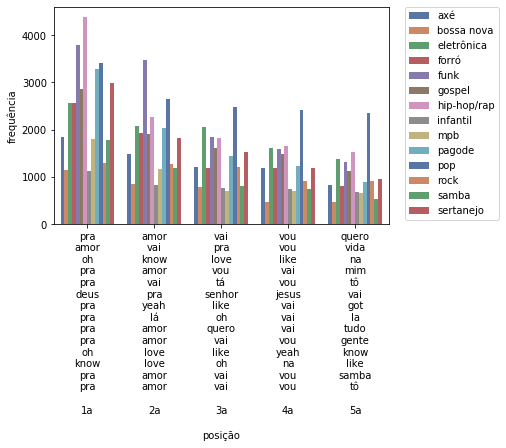

In [28]:
sns.barplot(x='posição', y="frequência", hue='gênero', palette='deep', data=words_lyrics_graph)

plt.xticks([0.001, 1, 2, 3, 4],['pra\namor\noh\npra\npra\ndeus\npra\npra\npra\npra\noh\nknow\npra\npra\n\n1a',
                                'amor\nvai\nknow\namor\nvai\npra\nyeah\nlá\namor\namor\nlove\nlove\namor\namor\n\n2a',
                                'vai\npra\nlove\nvou\ntá\nsenhor\nlike\noh\nquero\nvai\nlike\noh\nvai\nvai\n\n3a',
                                'vou\nvou\nlike\nvai\nvou\njesus\nvai\nvai\nvai\nvou\nyeah\nna\nvou\nvou\n\n4a',
                                'quero\nvida\nna\nmim\ntô\nvai\ngot\nla\ntudo\ngente\nknow\nlike\nsamba\ntô\n\n5a'])
plt.xlabel('\nposição')
# To relocate the legend
customlegend=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
customlegend.get_texts()[0].set_text('axé')
customlegend.get_texts()[1].set_text('bossa nova')
customlegend.get_texts()[2].set_text('eletrônica')
customlegend.get_texts()[3].set_text('forró')
customlegend.get_texts()[4].set_text('funk')
customlegend.get_texts()[5].set_text('gospel')
customlegend.get_texts()[6].set_text('hip-hop/rap')
customlegend.get_texts()[7].set_text('infantil')
customlegend.get_texts()[8].set_text('mpb')
customlegend.get_texts()[9].set_text('pagode')
customlegend.get_texts()[10].set_text('pop')
customlegend.get_texts()[11].set_text('rock')
customlegend.get_texts()[12].set_text('samba')
customlegend.get_texts()[13].set_text('sertanejo')

plt.savefig("5MaisFrequentes.png", bbox_inches='tight', dpi=600)

In [91]:
data_lyrics.to_csv('data_lyrics.csv', header=True)
words_lyrics_graph.to_csv('words_lyrics_graph.csv', header=True)

In [2]:
words_lyrics_graph = pd.read_csv('words_lyrics_graph.csv')